<a href="https://colab.research.google.com/github/Marcel-Milosz/Dane/blob/Code-Review/Milosz_Marcel_03_niestacj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>







Cross val score for cv = 3 [0.34542985 0.34712314 0.36884726]
Max:  0.36884725706191346 

Cross val score for cv = 5 [0.28349047 0.35157959 0.3533813  0.33481474 0.36453281]
Max:  0.36453281428665385 

Cross val score for cv = 10 [0.37566102 0.10727689 0.30374655 0.38050755 0.22515853 0.41506179
 0.30380439 0.34876534 0.32262628 0.42874276]
Max:  0.4287427630907267 



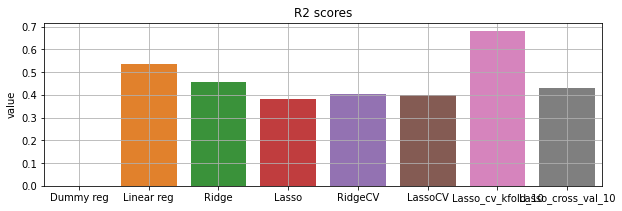

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LassoCV, Lasso

# Load diabetes db

diabetes = load_diabetes()

data, target = diabetes.data, diabetes.target

kf = KFold(n_splits=10)

# Split data using kfold
for train_index, test_index in kf.split(index):

    train_x, test_x = data[train_index], data[test_index]
    train_y, test_y = target[train_index], target[test_index]

    # print(f"\n\nTrain index: {train_index}")
    # print(f"Test index: {test_index}")

# Using for loop to get fold score
print("\n\n")

lasso_cv = LassoCV()

for k, (train, test) in enumerate(kf.split(index, value)):
    lasso_cv.fit(index[train], value[train])
    # print(f"Fold { k+1 } | Alpha: {lasso_cv.alpha_} | score: {lasso_cv.score(index[test], value[test])}")



# Using cros_val_score
print("\n\n")

arr = [3, 5, 10]
lasso = Lasso()

for n in arr:
  
    print(f"Cross val score for cv = {n}", cross_val_score(lasso, index, value, cv = n))
    print("Max: ", max(cross_val_score(lasso, index, value, cv=n)), "\n")



# Comparing pkt 1, 2 with exc 02
r2_score_dict = {
    "Dummy reg": 0.0,
    "Linear reg": 0.5356589189193967,
    "Ridge": 0.4552206856930059,
    "Lasso": 0.3807860624058743,
    "RidgeCV": 0.4045745545779539,
    "LassoCV": 0.40050373260020367,
    "Lasso_cv_kfold_10": 0.6827010716027995,
    "Lasso_cross_val_10": 0.4287427630907267,
}

r2_df = pd.DataFrame.from_dict(r2_score_dict, orient="index", columns=["value"])
sorted_r2_df = r2_df.sort_values(by=["value"])

plt.figure( figsize=(10, 3) )
sns.barplot(x = r2_df.index, y = r2_df.value)
plt.title("R2 scores")
plt.grid()
